# Ridge regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
data=load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
X=data.data
y=data.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr=LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred=lr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error

In [12]:
r2_score(y_test, y_pred)

0.4384316213369279

In [13]:
np.sqrt(mean_absolute_error(y_test, y_pred))

6.478805534162425

In [14]:
from sklearn.linear_model import Ridge

In [15]:
r=Ridge(alpha=0.0001)

In [16]:
r.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [17]:
y_pred=r.predict(X_test)

In [18]:
r2_score(y_test, y_pred)

0.4383103842973002

In [19]:
np.sqrt(mean_absolute_error(y_test, y_pred))

6.478921922321296

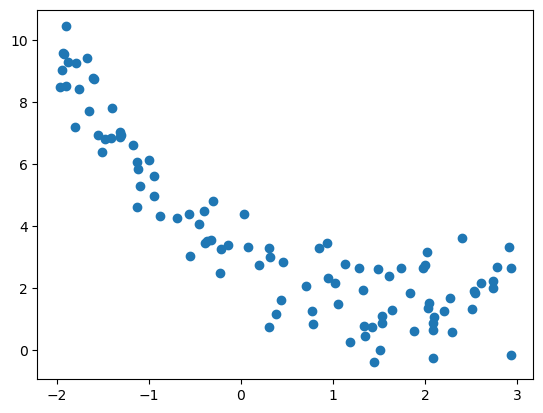

In [20]:
m=100

x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)

plt.scatter(x1, x2)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

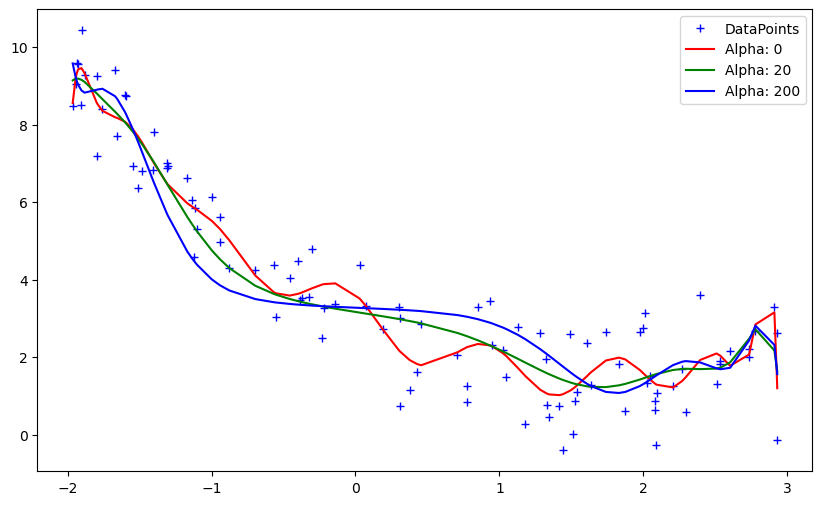

In [22]:
def get_preds_ridge(x1, x2, alpha):
    model=Pipeline([
        ("poly_feats", PolynomialFeatures(degree=16)),
        ("ridge", Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas=[0,20,200]
cs=["r","g","b"]

plt.figure(figsize=(10,6))
plt.plot(x1, x2, "b+", label="DataPoints")

for alpha, c in zip(alphas, cs):
    preds=get_preds_ridge(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label="Alpha: {}".format(alpha))
    
plt.legend()
plt.show()

In [23]:
from sklearn.datasets import make_regression

In [24]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=50, random_state=1)

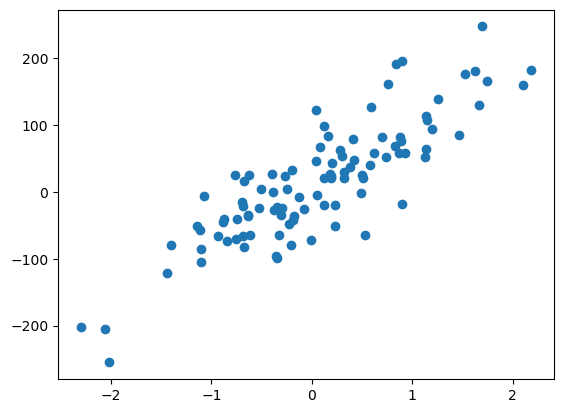

In [25]:
plt.scatter(X, y)
plt.show()

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X, y)

LinearRegression()

In [28]:
lr.coef_, lr.intercept_

(array([85.14546889]), 10.135071944054275)

In [29]:
from sklearn.linear_model import Ridge

In [30]:
r=Ridge()
r.fit(X,  y)

Ridge()

In [31]:
r.coef_, r.intercept_

(array([84.07243416]), 10.200079448108927)

In [32]:
r100=Ridge(alpha=100)
r100.fit(X,  y)

Ridge(alpha=100)

In [33]:
r100.coef_, r100.intercept_

(array([37.40484866]), 13.027334877638214)

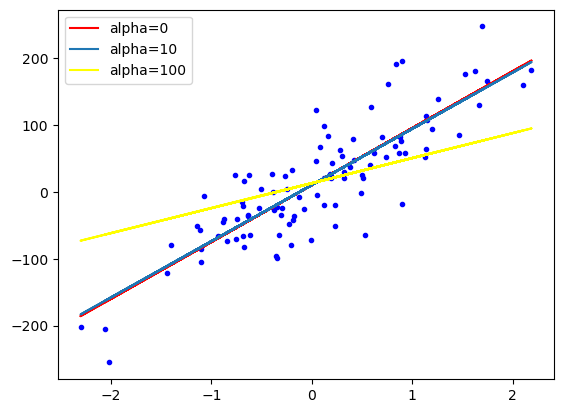

In [34]:
plt.plot(X, y, "b.")
plt.plot(X, lr.predict(X), color="red", label="alpha=0")
plt.plot(X, r.predict(X), label="alpha=10")
plt.plot(X, r100.predict(X), color="yellow", label="alpha=100")

plt.legend()
plt.show()

In [35]:
class MeraRidge():
    
    def __init__(self, alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None
    
    def fit(self, X_train, y_train):
        
        num=0
        den=0
        
        for i in range(X_train.shape[0]):
            
            num=num+(X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
            den=den+(X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())
            
        self.m=num/(den+self.alpha)
        self.b=y_train.mean()-(self.m*X_train.mean())
        
        print(self.m, self.b)
    
    def predict(X_test):
        pass
    

In [36]:
mr=MeraRidge(alpha=100)

In [37]:
mr.fit(X, y)

[37.40484866] [13.02733488]


# Ridge for n features

In [38]:
r=Ridge(alpha=0.1, solver="cholesky")

In [39]:
r.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [40]:
y_pred=r.predict(X_test)

In [41]:
r2_score(y_test, y_pred)

0.4327425972823411

In [42]:
print(r.coef_)
print(r.intercept_)

[ -14.41137838 -229.00458991  490.84358491  298.41673549  -57.81459817
  -70.98836625 -219.99604485  115.16095494  418.14944203   84.76971099]
151.46369705067704


In [43]:
class MeraNRidge:
    
    def __init__(self, alpha=0.1):
        
        self.alpha=alpha
        self.coef_=None
        self.intercept_=None
        
    def fit(self, X_train, y_train):
        
        X_train=np.insert(X_train, 0, 1, axis=1)
        I=np.identity(X_train.shape[1])
        I[0][0]=0
        
        result=np.linalg.inv(np.dot(X_train.T, X_train)+self.alpha*I).dot(X_train.T).dot(y_train)
        
        self.intercept_=result[0]
        self.coef_=result[1:]
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_)+self.intercept_

In [44]:
mnr=MeraNRidge()

In [45]:
mnr.fit(X_train, y_train)

In [46]:
y_pred=mnr.predict(X_test)

In [47]:
print(r2_score(y_test, y_pred))
print(r.coef_)
print(r.intercept_)

0.4327425972823411
[ -14.41137838 -229.00458991  490.84358491  298.41673549  -57.81459817
  -70.98836625 -219.99604485  115.16095494  418.14944203   84.76971099]
151.46369705067704


# Ridge with Gradient Descent

In [48]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

In [49]:
X ,y=load_diabetes(return_X_y=True)

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [51]:
sgdr=SGDRegressor(penalty="l2", max_iter=200, eta0=0.1, learning_rate="constant", alpha=0.01)

In [52]:
sgdr.fit(X_train, y_train)

SGDRegressor(alpha=0.01, eta0=0.1, learning_rate='constant', max_iter=200)

In [53]:
y_pred=sgdr.predict(X_test)

In [54]:
print(r2_score(y_test, y_pred))
print(sgdr.coef_)
print(sgdr.intercept_)

0.27326628090837557
[ 32.37676839 -15.86981349 146.79935744 103.20986328  23.56058725
  10.45787413 -86.908596    79.75767154 127.55567092  75.01922144]
[152.44902612]


In [55]:
r=Ridge(alpha=0.01, max_iter=500, solver="sparse_cg")

In [56]:
r.fit(X_train, y_train)

Ridge(alpha=0.01, max_iter=500, solver='sparse_cg')

In [57]:
y_pred=r.predict(X_test)

In [58]:
print(r2_score(y_test, y_pred))
print(r.coef_)
print(r.intercept_)

0.4331856598584902
[ -28.93615526 -265.9987019   527.9183301   322.69926547 -254.02712151
   75.82380028 -169.39735003  103.83779769  536.15321563   65.99061193]
151.39391189012363


In [59]:
class MeraRidgeGD():
    
    def __init__(self, ephocs, learning_rate, alpha):
        self.alpha=alpha
        self.learning_rate=learning_rate
        self.ephocs=ephocs
        self.coef_=None
        self.intercept_=None
    
    def fit(self, X_train, y_train):
        
        self.coef_=np.ones(X_train.shape[1])
        self.intercept_=0
        thetha=np.insert(self.coef_, 0, self.intercept_)
        
        X_train=np.insert(X_train, 0, 1, axis=1)
        
        for i in range(self.ephocs):
            thetha_der=np.dot(X_train.T, X_train).dot(thetha)-np.dot(X_train.T, y_train)+self.alpha*thetha
            thetha=thetha-self.learning_rate*thetha_der
            
        self.coef_=thetha[1:]
        self.intercept_=thetha[0]
          
    def predict(self, X_test):
        return np.dot(X_test, self.coef_)+self.intercept_   

In [60]:
mrgd=MeraRidgeGD(ephocs=500, learning_rate=0.005, alpha=0.01)

In [61]:
mrgd.fit(X_train, y_train)

In [62]:
y_pred=mrgd.predict(X_test)

In [63]:
print(r2_score(y_test, y_pred))
print(mrgd.coef_)
print(mrgd.intercept_)

0.4335933878950359
[-4.47092400e-02 -2.09060880e+02  4.86481648e+02  2.93250000e+02
 -3.42486493e+01 -9.41861432e+01 -2.22162968e+02  1.35353793e+02
  3.87019676e+02  1.17843730e+02]
151.42905880444312


# Lasso Regression

In [90]:
from sklearn.linear_model import Lasso

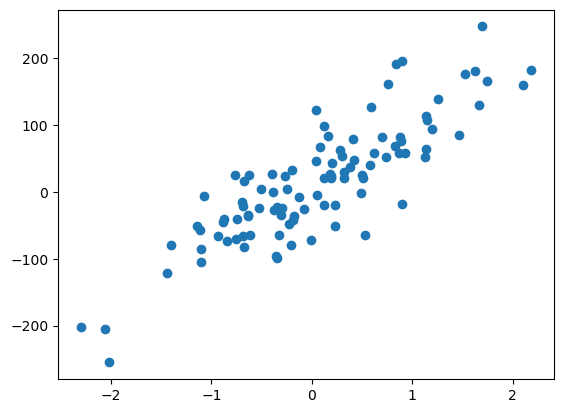

In [91]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=50, random_state=1)
plt.scatter(X, y)
plt.show()

In [92]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [93]:
lr=LinearRegression()

In [94]:
lr.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred=lr.predict(X_test)

In [96]:
print(r2_score(y_test, y_pred))
print(lr.coef_)
print(lr.intercept_)

0.7217873101600791
[83.87324855]
10.70572120790149


C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.985e+04, tolerance: 6.010e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

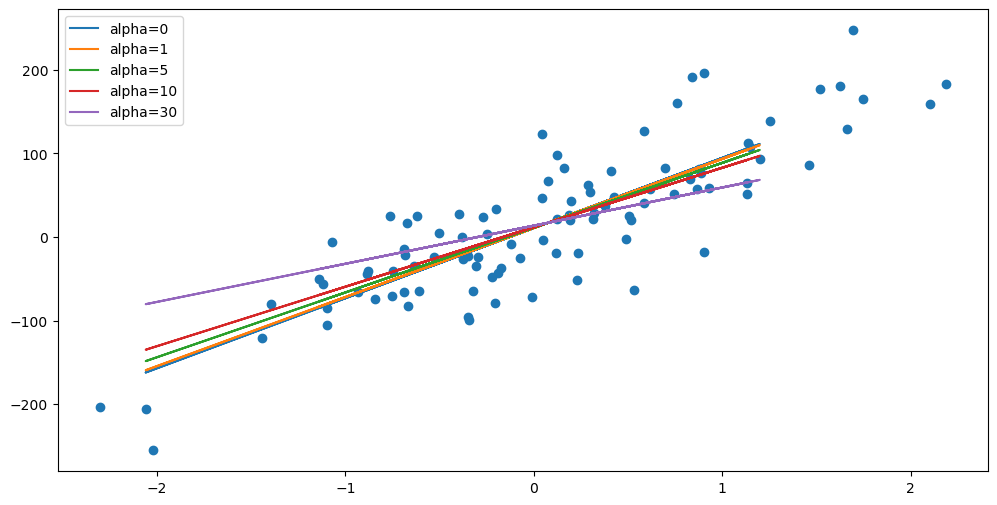

In [97]:
alphas=[0,1, 5, 10, 30]
plt.figure(figsize=(12, 6))
plt.scatter(X, y)

for i in alphas:
    l=Lasso(alpha=i)
    l.fit(X_train, y_train)
    plt.plot(X_test, l.predict(X_test), label="alpha={}".format(i))

plt.legend()
plt.show()

# ElasticNet Regression

In [98]:
#using the diabetes dataset
from sklearn.linear_model import ElasticNet

In [99]:
data=load_diabetes()

In [100]:
X=data.data
y=data.target

In [101]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [102]:
#LR
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print(r2_score(y_test, y_pred))
print(lr.coef_)
print(lr.intercept_)

0.4384316213369279
[ -30.62219046 -272.2506057   528.85252681  327.69716891 -581.01973841
  332.97061365  -27.97314298  139.28036115  665.07667773   61.90517166]
151.4300932966009


In [104]:
#Ridge
r=Ridge(alpha=0.1)
r.fit(X_train, y_train)
y_pred=r.predict(X_test)
print(r2_score(y_test, y_pred))
print(r.coef_)
print(r.intercept_)

0.4327425972823411
[ -14.41137838 -229.00458991  490.84358491  298.41673549  -57.81459817
  -70.98836625 -219.99604485  115.16095494  418.14944203   84.76971099]
151.46369705067704


In [107]:
#lasso
l=Lasso(alpha=0.1)
l.fit(X_train, y_train)
y_pred=l.predict(X_test)
print(r2_score(y_test, y_pred))
print(l.coef_)
print(l.intercept_)

0.43098608350820133
[  -0.         -190.85806128  527.09134272  272.96165068  -30.17039029
   -0.         -254.43742308    0.          459.3432742    28.70565918]
151.53539129063563


In [108]:
#ElasticNet
el=ElasticNet(alpha=0.005, l1_ratio=0.9)
el.fit(X_train, y_train)
y_pred=el.predict(X_test)
print(r2_score(y_test, y_pred))
print(el.coef_)
print(el.intercept_)

0.43203193074172475
[  -2.95451247 -201.27032353  461.24109763  279.92799637  -34.9834885
  -71.43757293 -212.37314092  118.09817467  383.90833193   93.4397114 ]
151.5453534826226
